DHRobot: Frank, 5 joints (RRRRR), dynamics, standard DH parameters
┌───────────┬───────┬───────┬───────┐
│    θⱼ     │  dⱼ   │  aⱼ   │  ⍺ⱼ   │
├───────────┼───────┼───────┼───────┤
│  q1       │ 0.155 │ 0.287 │ 90.0° │
│  q2 + 90° │     0 │   0.8 │  0.0° │
│  q3       │     0 │   0.8 │  0.0° │
│  q4 + 90° │     0 │     0 │ 90.0° │
│  q5       │ 0.317 │     0 │  0.0° │
└───────────┴───────┴───────┴───────┘

┌──┬──┐
└──┴──┘



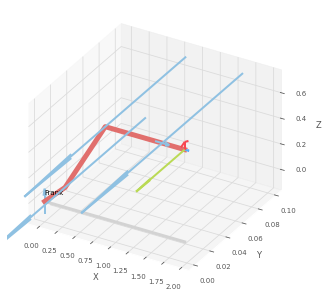

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Frank')

<Figure size 432x288 with 0 Axes>

In [5]:
import roboticstoolbox as rtb
import numpy as np

L1 = rtb.RevoluteDH(a=0.287, alpha=np.pi/2, d=0.155, offset=0)
L2 = rtb.RevoluteDH(a=0.8, alpha=0, d=0, offset=np.pi/2)
L3 = rtb.RevoluteDH(a=0.8, alpha=0, d=0.0, offset=0)
L4 = rtb.RevoluteDH(a=0.0, alpha=np.pi/2, d=0.0, offset=np.pi/2)
L5 = rtb.RevoluteDH(a=0.0, alpha=0, d=0.317, offset=0)
# Cria o modelo do robô
robot = rtb.DHRobot([L1, L2, L3, L4, L5], name="Frank")
print(robot) # Retorna a tabela 1

# Define a configuração das juntas para a posição da figura 1
q = [0, -np.pi/4, -np.pi/4, 0, 0]
robot.plot(q, backend='pyplot') # Gera a figura 2

In [6]:
print("T1")
print(L1.A(np.pi/6))
print("T2")
print(L2.A(np.pi/6))
print("T3")
print(L3.A(np.pi/6))
print("T4")
print(L4.A(np.pi/6))
print("T5")
print(L5.A(np.pi/6))

T1
   0.866     0         0.5       0.2485    
   0.5       0        -0.866     0.1435    
   0         1         0         0.155     
   0         0         0         1         

T2
  -0.5      -0.866     0        -0.4       
   0.866    -0.5       0         0.6928    
   0         0         1         0         
   0         0         0         1         

T3
   0.866    -0.5       0         0.6928    
   0.5       0.866     0         0.4       
   0         0         1         0         
   0         0         0         1         

T4
  -0.5       0         0.866     0         
   0.866     0         0.5       0         
   0         1         0         0         
   0         0         0         1         

T5
   0.866    -0.5       0         0         
   0.5       0.866     0         0         
   0         0         1         0.317     
   0         0         0         1         



In [7]:
angle = 0
print("O1")
print(L1.A(angle))
print("O2")
print(L1.A(angle) @ L2.A(angle))
print("O3")
print(L1.A(angle) @ L2.A(angle) @ L3.A(angle))
print("O4")
print(L1.A(angle) @ L2.A(angle) @ L3.A(angle) @ L4.A(angle))
print("O5")
print(L1.A(angle) @ L2.A(angle) @ L3.A(angle) @ L4.A(angle) @ L5.A(angle))

O1
   1         0         0         0.287     
   0         0        -1         0         
   0         1         0         0.155     
   0         0         0         1         

O2
   0        -1         0         0.287     
   0         0        -1         0         
   1         0         0         0.955     
   0         0         0         1         

O3
   0        -1         0         0.287     
   0         0        -1         0         
   1         0         0         1.755     
   0         0         0         1         

O4
  -1         0         0         0.287     
   0        -1         0         0         
   0         0         1         1.755     
   0         0         0         1         

O5
  -1         0         0         0.287     
   0        -1         0         0         
   0         0         1         2.072     
   0         0         0         1         



In [8]:
print("O5 - Origem")
print(L1.A(0) @ L2.A(-np.pi/4) @ L3.A(-np.pi/4) @ L4.A(0) @ L5.A(0))

O5 - Origem
   0         0         1         1.97      
   0        -1         0         0         
   1         0         0         0.7207    
   0         0         0         1         



In [11]:
# Jacobiano
q = [0, 0, 0, 0, 0]
jacob = robot.jacob0(q)
print("Size of the Jacobian: ", len(jacob), "x", len(jacob[0]))
print([format(i, '>7.4f') for i in jacob[0]])
print([format(i, '>7.4f') for i in jacob[1]])
print([format(i, '>7.4f') for i in jacob[2]])
print([format(i, '>7.4f') for i in jacob[3]])
print([format(i, '>7.4f') for i in jacob[4]])
print([format(i, '>7.4f') for i in jacob[5]])

Size of the Jacobian:  6 x 5
['-0.0000', '-1.9170', '-1.1170', '-0.3170', ' 0.0000']
[' 0.2870', ' 0.0000', ' 0.0000', ' 0.0000', ' 0.0000']
[' 0.0000', ' 0.0000', ' 0.0000', ' 0.0000', ' 0.0000']
[' 0.0000', ' 0.0000', ' 0.0000', ' 0.0000', ' 0.0000']
[' 0.0000', '-1.0000', '-1.0000', '-1.0000', ' 0.0000']
[' 1.0000', ' 0.0000', ' 0.0000', ' 0.0000', ' 1.0000']


In [13]:
import numpy as np
import roboticstoolbox as rtb

def differential_ik(robot: rtb.DHRobot, qi, final_pos, final_ori):
    initial_fk = robot.fkine(qi)
    initial_pos = initial_fk.t 
    initial_ori = initial_fk.rpy()
    # Cinemática inversa diferencial
    max_iterations = 100
    # Calcular velocidade inicial com base na distância da posição atual até o robô
    lin_gain = 2.0
    ang_gain = 0.2
    lin_vel = [lin_gain * (x[0] - x[1]) for x in zip(final_pos, initial_pos)]
    # ang_vel = [ang_gain * (x[0] - x[1]) for x in zip(final_ori, initial_ori)]
    ang_vel = [0,0,0]
    print(f"Initial position: {initial_pos}")
    print(f"Initial orientation: {initial_ori}")
    print(f"Final position: {final_pos}")
    print(f"Final orientation: {final_ori}")
    print(f"Linear Velocity: {lin_vel}")
    print(f"Angular Velocity: {ang_vel}")
    for i in range(0, max_iterations): 
        # TODO: Ajustar velocidade de acordo com a distância para a posição alvo
        qn = jacobian_ik(robot, qi, lin_vel=lin_vel, ang_vel=ang_vel, dt=0.1)
        curr_pos = robot.fkine(qn)
        print(f"Position on iteration {i}: {[format(i, '.3f') for i in curr_pos.t]}")

        # Verifica se chegamos na posição alvo
        reached_pos = np.allclose(final_pos, curr_pos.t,atol=1e-3)
        reached_angle = np.allclose(final_ori, curr_pos.rpy(),atol=1e-3)
        if reached_pos and reached_angle: break
        
        # Atualiza os valores para o próximo loop
        qi = qn
        lin_vel = [lin_gain * (x[0] - x[1]) for x in zip(final_pos, curr_pos.t)]
        # ang_vel = [ang_gain * (x[0] - x[1]) for x in zip(final_ori, curr_pos.rpy())]
    return qn

def jacobian_ik(robot: rtb.DHRobot, q, lin_vel, ang_vel, dt):
    J = robot.jacob0(q)
    v = np.zeros(6)
    v[:3] = lin_vel
    v[3:] = ang_vel
    dq = np.linalg.pinv(J) @ v
    nq = q + dq * dt
    return nq


Executing task 0
Initial position: [ 1.65268542e+00 -4.18306128e-18  4.03685425e-01]
Initial orientation: [ 3.14159265e+00 -1.01465364e-17 -1.15499891e-33]
Final position: [ 1.65268542e+00 -4.18306128e-18  4.03685425e-01]
Final orientation: [3.141592653589793, 0, 0]
Linear Velocity: [0.0, 0.0, 0.0]
Angular Velocity: [0, 0, 0]
Position on iteration 0: ['1.653', '-0.000', '0.404']
Final IK position is:  [ 0.         -0.78539816 -0.78539816 -1.57079633  0.        ]


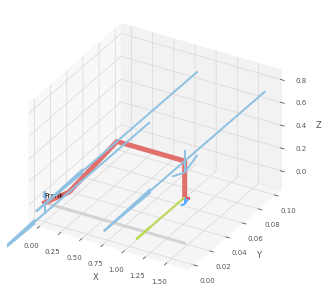


Executing task 1
Initial position: [ 1.65268542e+00 -4.18306128e-18  4.03685425e-01]
Initial orientation: [ 3.14159265e+00 -1.01465364e-17 -1.15499891e-33]
Final position: [1.2, 0.4, 0.5]
Final orientation: [3.141592653589793, 0, 0]
Linear Velocity: [-0.9053708498984765, 0.8, 0.19262915010152393]
Angular Velocity: [0, 0, 0]
Position on iteration 0: ['1.550', '0.075', '0.415']
Position on iteration 1: ['1.476', '0.137', '0.429']
Position on iteration 2: ['1.419', '0.187', '0.442']
Position on iteration 3: ['1.374', '0.228', '0.452']
Position on iteration 4: ['1.339', '0.262', '0.461']
Position on iteration 5: ['1.311', '0.289', '0.469']
Position on iteration 6: ['1.288', '0.311', '0.475']
Position on iteration 7: ['1.270', '0.328', '0.480']
Position on iteration 8: ['1.256', '0.342', '0.484']
Position on iteration 9: ['1.245', '0.354', '0.487']
Position on iteration 10: ['1.236', '0.363', '0.490']
Position on iteration 11: ['1.229', '0.370', '0.492']
Position on iteration 12: ['1.223',

<Figure size 432x288 with 0 Axes>

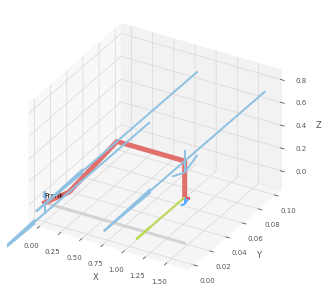


Executing task 2
Initial position: [1.20080481 0.39916103 0.499762  ]
Initial orientation: [3.14159265e+00 5.94884717e-16 3.65807136e-17]
Final position: [1.2, 0.4, 0.2]
Final orientation: [3.141592653589793, 0, 0]
Linear Velocity: [-0.0016096183256144592, 0.0016779304936745953, -0.5995239918070647]
Angular Velocity: [0, 0, 0]
Position on iteration 0: ['1.199', '0.399', '0.440']
Position on iteration 1: ['1.198', '0.399', '0.392']
Position on iteration 2: ['1.197', '0.399', '0.354']
Position on iteration 3: ['1.197', '0.399', '0.323']
Position on iteration 4: ['1.198', '0.399', '0.299']
Position on iteration 5: ['1.198', '0.399', '0.279']
Position on iteration 6: ['1.198', '0.399', '0.263']
Position on iteration 7: ['1.198', '0.399', '0.251']
Position on iteration 8: ['1.199', '0.399', '0.241']
Position on iteration 9: ['1.199', '0.400', '0.232']
Position on iteration 10: ['1.199', '0.400', '0.226']
Position on iteration 11: ['1.199', '0.400', '0.221']
Position on iteration 12: ['1.19

<Figure size 432x288 with 0 Axes>

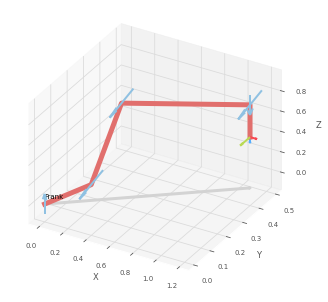

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [14]:
# Simula uma aplicação de pick and place
qi = [0, -np.pi/4, -np.pi/4, -np.pi/2, 0]
initial_fk = robot.fkine(qi)

task = [
    {"pos": initial_fk.t, "ori": [np.pi, 0, 0]}, # Apenas rodando
    {"pos": [1.2, 0.4, 0.5], "ori": [np.pi, 0, 0]}, # Indo até a acima do objeto
    {"pos": [1.2, 0.4, 0.2], "ori": [np.pi, 0, 0]}, # Descendo para pegar
    {"pos": [1.2, 0.4, 0.5], "ori": [np.pi, 0, 0]}, # Retornando
    {"pos": [1.5, -0.4, 0.5], "ori": [np.pi, 0, 0]}, # Indo até a posição de deposito
    {"pos": [1.5, -0.4, 0.2], "ori": [np.pi, 0, 0]}, # Descendo para colocar
    {"pos": [1.5, -0.4, 0.5], "ori": [np.pi, 0, 0]}, # Subindo depois de colocar
    {"pos": initial_fk.t, "ori": initial_fk.rpy()}, # Retornando para posição inicial
]

task_counter = 0
for point in task:
    print(f"\nExecuting task {task_counter}")

    final_pos = point["pos"]
    final_ori = point["ori"]
    qn = differential_ik(robot, qi, final_pos, final_ori)

    print("Final IK position is: ", qn)
    traj = rtb.jtraj(qi, qn, 50)
    robot.plot(traj.q)
    qi = qn
    task_counter += 1